In [16]:
import urllib.request
from bs4 import BeautifulSoup as soup
import requests
import re
import pandas as pd
import dataframe_image as dfi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

rallyname = 'Kritis'
raceDate = '21-22/10/2023'
surface = 'Tarmac'
competition = 'Championship'

link = 'https://www.ewrc-results.com/results/85679-rally-kritis-2023/?s='
startat, no_ss=440950, int(8)
canceled = []

stages = [number for number in range(no_ss)]


rally_23 = []

In [17]:
if canceled:
    for j in canceled: stages.remove(j-1)
#print(stages)


In [18]:
for ss in range(0,(no_ss)):
    val= startat + ss
    ss_a = str(val)
    my_url11 = link + ss_a
    #print(my_url11)
    req = urllib.request.Request(my_url11, headers={'User-Agent': 'Mozilla/5.0'})
    uClient11 = urllib.request.urlopen(req)
    page_html11 = uClient11.read()
    uClient11.close()
    data = pd.read_html(page_html11)[0]
    data.columns=['Pos.', 'No', 'Crew', 'Gr/Cl','ss_time', 'Diff', 'Speed']
    data['ss']=ss+1
    equal = '=' in data['Pos.'].unique()
    if equal:
        data['Pos.'] = data['Pos.'].replace('=', method='ffill')
        data['Pos.'] = data['Pos.'].astype(str).astype(float)
    #print(data.dtypes)
    #print(data)
    rally_23.append(data) 

In [19]:
rally2023_stages = pd.concat(rally_23, axis=0)

In [20]:
rally2023_stages = pd.concat(rally_23, axis=0)
rally2023_stages['Pos.'] = rally2023_stages['Pos.'].astype(int)
#rally2023_stages['No'] = rally2023_stages['No.'].str[1:]
#rally2023_stages.to_csv('03_rally2023.csv', index=False)
rally2023_stages = rally2023_stages.fillna("-")
rally2023_stages = rally2023_stages.rename(columns={'Driver / Co-driver Vehicle': "Crew"})
rally2023_stages['Race'] = rallyname
rally2023_stages['date'] = raceDate
rally2023_stages['surface'] = surface
rally2023_stages['competition'] = competition
rally2023_stages['Crew'] = rally2023_stages['Crew'].str[:14]
rally2023_stages = rally2023_stages.sort_values(by=['Race', 'ss'])
rally2023_stages['cou']= rally2023_stages.groupby(['Race', 'ss']).cumcount()+1
rally2023_stages

,Pos.,No,Crew,Gr/Cl,ss_time,Diff,Speed,ss,Race,date,surface,competition,cou
0,1,#2,Aligizakis E.,C1,3:36.23,-,118.9,1,Kritis,21-22/10/2023,Tarmac,Championship,1
1,2,#1,Anapoliotakis,C1,3:41.08,+4.85 + 4.85,116.3 0.68,1,Kritis,21-22/10/2023,Tarmac,Championship,2
2,3,#4,Peroulakis Geo,C2,3:47.37,+11.14 + 6.29,113.0 1.56,1,Kritis,21-22/10/2023,Tarmac,Championship,3
3,4,#3,Ktistakis Dimi,C3 F2,3:56.02,+19.79 + 8.65,108.9 2.77,1,Kritis,21-22/10/2023,Tarmac,Championship,4
4,5,#5,Kazanas Dimitr,C2,3:57.48,+21.25 + 1.46,108.2 2.98,1,Kritis,21-22/10/2023,Tarmac,Championship,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17,18,#26,Poulakis Mihal,C6 F2,5:45.88,+1:01.78 + 8.30,111.6 5.76,8,Kritis,21-22/10/2023,Tarmac,Championship,18
18,19,#30,Manouskos Niko,C6 F2,5:48.32,+1:04.22 + 2.44,110.8 5.99,8,Kritis,21-22/10/2023,Tarmac,Championship,19
19,20,#28,Kapsalakis D.,C3 F2,5:52.43,+1:08.33 + 4.11,109.5 6.37,8,Kritis,21-22/10/2023,Tarmac,Championship,20
20,21,#24,Massialas Vage,C6 F2,6:03.65,+1:19.55 + 11.22,106.1 7.42,8,Kritis,21-22/10/2023,Tarmac,Championship,21


In [21]:
rally2023_stageClass=rally2023_stages.drop(['No', 'Diff', 'Speed', 'ss_time', 'cou', 'date', 'surface', 'competition'], axis=1)
rally2023_stageTimes=rally2023_stages.drop(['No', 'Diff', 'Speed', 'cou', 'date', 'surface', 'competition', 'Pos.'], axis=1)
rally2023_stageClass['Pos.'] = rally2023_stageClass['Pos.'].astype(str)
rally2023_ClassView = rally2023_stageClass.set_index(['Crew','Gr/Cl','ss','Race'], drop=True).unstack('ss')
rally2023_TimeView = rally2023_stageTimes.set_index(['Crew','Gr/Cl', 'ss', 'Race'], drop=True).unstack('ss')
rally2023_ClassView = rally2023_ClassView.fillna("-")
rally2023_TimeView = rally2023_TimeView.fillna("-")
#rally2023_stageClass2 = rally2023_stageClass.loc[((rally2023_stageClass['Group'] == 'RC1') | (rally2023_stageClass['Group'] == 'RC2'))] 
#rally2023_ClassView2 = rally2023_stageClass2.set_index(['No','Crew','Group','ss', 'Race'], drop=True).unstack('ss')
#rally2023_ClassView2 = rally2023_ClassView2.fillna("-")

In [22]:
rally2023_ClassView.to_csv(str(rallyname) +'_Stages_Classification.csv')
rally2023_TimeView.to_csv(str(rallyname) + '_Stages_Times.csv')

In [23]:
pd.set_option("display.max_columns", None)

dfi.export(rally2023_ClassView, (str(rallyname) + '_Stages_Classification.jpg'))


In [24]:
rally2023_stages[['time_mm','time_ss']] = rally2023_stages['ss_time'].str.split(':', expand=True)
#rally2023_stages['time_hh']= rally2023_stages['time_hh'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_mm']= rally2023_stages['time_mm'].astype(str).astype(int,errors='ignore')
rally2023_stages['time_ss']= pd.to_numeric(rally2023_stages['time_ss'], errors='coerce')
rally2023_stages['time_SS_sec'] = rally2023_stages['time_mm']*60 + rally2023_stages['time_ss']
rally2023_stages = rally2023_stages.drop(['Pos.', 'No', 'ss_time', 'Diff',  'Speed', 'time_mm', 'time_ss'], axis=1)
rally2023_stages.to_csv(str(rallyname) + '_Stages_Times_Sec.csv',index=False)
rally2023_stages


,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec
0,Aligizakis E.,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,1,216.23
1,Anapoliotakis,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,2,221.08
2,Peroulakis Geo,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,3,227.37
3,Ktistakis Dimi,C3 F2,1,Kritis,21-22/10/2023,Tarmac,Championship,4,236.02
4,Kazanas Dimitr,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,5,237.48
...,...,...,...,...,...,...,...,...,...
17,Poulakis Mihal,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,18,345.88
18,Manouskos Niko,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,19,348.32
19,Kapsalakis D.,C3 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,20,352.43
20,Massialas Vage,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,21,363.65


In [25]:
min_value = rally2023_stages.groupby(['Race', 'ss'])['time_SS_sec'].min()
#min_value = pd.DataFrame(min_value)

min_value2 =  pd.DataFrame(min_value)

min_value2 = min_value2.rename(columns={'time_SS_sec' : 'min_time'})
min_value2

min_time
Race   ss          
Kritis 1     216.23
       2     217.24
       3     289.56
       4     289.00
       5     284.77
       6     287.21
       7     285.72
       8     284.10

In [26]:
ss_times_F = rally2023_stages.merge(min_value2, on=['Race', 'ss'])
ss_times_F['diff']=ss_times_F['time_SS_sec'] - ss_times_F['min_time']
ss_times_F['diff%']=(ss_times_F['time_SS_sec'] - ss_times_F['min_time'])/ss_times_F['min_time']*100
ss_times_F['SS.']=ss_times_F['ss'].apply(lambda x: '{0:0>2}'.format(x))
ss_times_F

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Aligizakis E.,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,1,216.23,216.23,0.00,0.000000,01
1,Anapoliotakis,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,2,221.08,216.23,4.85,2.242982,01
2,Peroulakis Geo,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,3,227.37,216.23,11.14,5.151922,01
3,Ktistakis Dimi,C3 F2,1,Kritis,21-22/10/2023,Tarmac,Championship,4,236.02,216.23,19.79,9.152292,01
4,Kazanas Dimitr,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,5,237.48,216.23,21.25,9.827498,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,Poulakis Mihal,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,18,345.88,284.10,61.78,21.745864,08
184,Manouskos Niko,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,19,348.32,284.10,64.22,22.604717,08
185,Kapsalakis D.,C3 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,20,352.43,284.10,68.33,24.051390,08
186,Massialas Vage,C6 F2,8,Kritis,21-22/10/2023,Tarmac,Championship,21,363.65,284.10,79.55,28.000704,08


In [27]:
ss_times_C6 = ss_times_F[ss_times_F['Gr/Cl'].str.contains('|'.join(['C1', 'C2']))]
ss_times_C6

,Crew,Gr/Cl,ss,Race,date,surface,competition,cou,time_SS_sec,min_time,diff,diff%,SS.
0,Aligizakis E.,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,1,216.23,216.23,0.00,0.000000,01
1,Anapoliotakis,C1,1,Kritis,21-22/10/2023,Tarmac,Championship,2,221.08,216.23,4.85,2.242982,01
2,Peroulakis Geo,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,3,227.37,216.23,11.14,5.151922,01
4,Kazanas Dimitr,C2,1,Kritis,21-22/10/2023,Tarmac,Championship,5,237.48,216.23,21.25,9.827498,01
27,Anapoliotakis,C1,2,Kritis,21-22/10/2023,Tarmac,Championship,1,217.24,217.24,0.00,0.000000,02
28,Aligizakis E.,C1,2,Kritis,21-22/10/2023,Tarmac,Championship,2,217.76,217.24,0.52,0.239367,02
29,Peroulakis Geo,C2,2,Kritis,21-22/10/2023,Tarmac,Championship,3,224.87,217.24,7.63,3.512245,02
36,Kazanas Dimitr,C2,2,Kritis,21-22/10/2023,Tarmac,Championship,10,237.85,217.24,20.61,9.487203,02
52,Anapoliotakis,C1,3,Kritis,21-22/10/2023,Tarmac,Championship,1,289.56,289.56,0.00,0.000000,03
53,Aligizakis E.,C1,3,Kritis,21-22/10/2023,Tarmac,Championship,2,290.33,289.56,0.77,0.265921,03


In [28]:
ss_times_F3 =ss_times_C6.drop(['Gr/Cl','time_SS_sec','cou', 'ss'], axis=1)
ss_times_F4 = pd.pivot_table(ss_times_F3, values='diff', 
                                index='Crew', 
                                columns=['Race', 'SS.'])
ss_times_F4

Race           Kritis                                                 
SS.                01     02     03     04     05     06     07     08
Crew                                                                  
Aligizakis E.    0.00   0.52   0.77   0.00   0.00   0.00   0.26   0.00
Anapoliotakis    4.85   0.00   0.00   1.01   0.72   0.50   0.00   2.11
Kazanas Dimitr  21.25  20.61  19.31  25.81  22.72  21.78  16.67  22.86
Peroulakis Geo  11.14   7.63   9.41   9.76   9.30  10.93   9.44   9.76

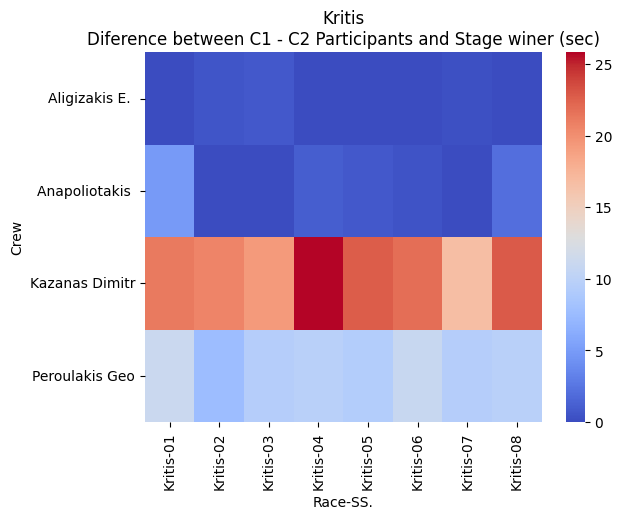

In [29]:
Heatmap_ALL = sns.heatmap(ss_times_F4, cmap='coolwarm')
plt.title(rallyname+'\nDiference between C1 - C2 Participants and Stage winer (sec)')
plt.savefig((rallyname) + "Heatmap_C1.png")

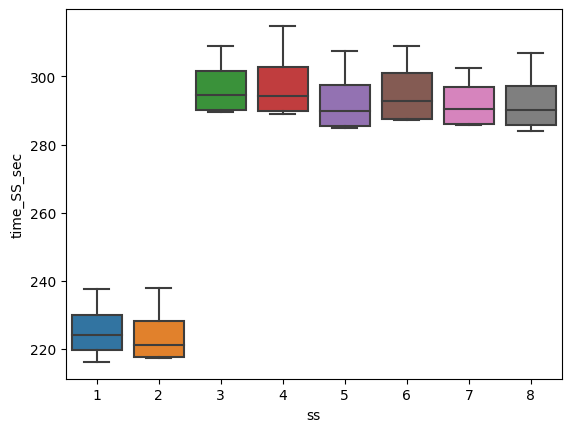

In [30]:
bplt=sns.boxplot( y=ss_times_C6["time_SS_sec"], x=ss_times_C6["ss"])

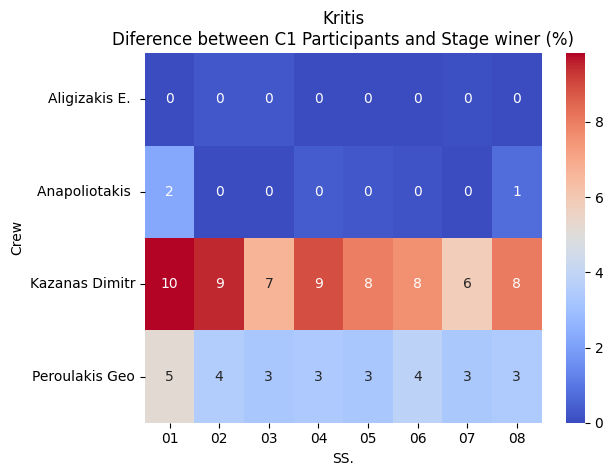

In [31]:
ss_timesa = pd.pivot_table(ss_times_C6, values='diff%', 
                                index='Crew', 
                                columns=['SS.'])
Heatmap_ = sns.heatmap(ss_timesa, annot=True, fmt=',.0f', cmap='coolwarm')
plt.title(rallyname +'\nDiference between C1 Participants and Stage winer (%)')
plt.savefig(rallyname + "C1.jpg")